## Observations and Insights 

### During my analysis of mice identified with SCC tumors I found the following observations:

    * Capomulin had the most measurements identified in the study with Ramicane coming in second
            - The average tumor size with the Capomulin drug regimen had the second lowest 
            Tumor Volume average at 40.68 (mm3) and Ramicane having the lowest Tumor Volume average at 40.22 (mm3)
   ![Total_Measurements](Images/Total_Measurements.png)
              
           
           
                
    * There was a mostly equal distribution of female and male mice in the study (49.6% female to 50.4% male)
   ![Distribution_of_Males_Females](Images/distribution_male_female.png)
   
   
    * The Correlation Coefficient between mouse weight and average tumor volume on Capomulin is strong with a value of 0.84
   ![Linear_Regression_Model](Images/linear_regression.png)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mouse_count = combined_mouse_data["Mouse ID"].nunique()
mouse_count

249

In [6]:
# Getting the Mouse ID numbers that show up with duplicate Timepoints.
combined_mouse_data[combined_mouse_data[["Mouse ID","Timepoint"]].duplicated() == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Display all the data for the duplicate mouse ID
duplicate_mouse = combined_mouse_data.loc[combined_mouse_data["Mouse ID"]=="g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.
clean_combined_mouse_data = combined_mouse_data.drop(combined_mouse_data.index[908:921])
clean_combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_combined_mouse_data["Mouse ID"].nunique()
clean_mouse_count

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_group = clean_combined_mouse_data.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = drug_regimen_group["Tumor Volume (mm3)"].mean()
drug_median = drug_regimen_group["Tumor Volume (mm3)"].median()
drug_variance = drug_regimen_group["Tumor Volume (mm3)"].var()
drug_std = drug_regimen_group["Tumor Volume (mm3)"].std()
drug_sem = drug_regimen_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_statistics = pd.DataFrame({"Mean": drug_mean,"Median":drug_median,"Variance":drug_variance,\
                                   "Standard Deviation":drug_std,"SEM":drug_sem})
summary_statistics["Mean"] = summary_statistics["Mean"].map("{:,.2f}".format)
summary_statistics["Median"] = summary_statistics["Median"].map("{:,.2f}".format)
summary_statistics["Variance"] = summary_statistics["Variance"].map("{:,.2f}".format)
summary_statistics["Standard Deviation"] = summary_statistics["Standard Deviation"].map("{:,.2f}".format)
summary_statistics["SEM"] = summary_statistics["SEM"].map("{:,.2f}".format)
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

# Calculate summary statistics using .agg (aggregation method)
clean_combined_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(Mean="mean",Median="median",Variance="var",Standard_Deviation="std",SEM="sem")

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

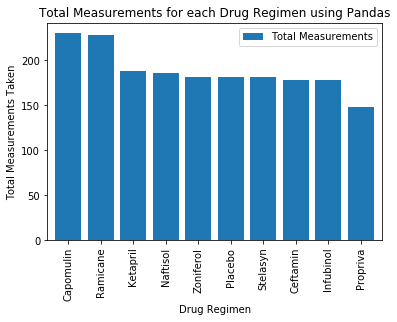

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_data = clean_combined_mouse_data["Drug Regimen"].value_counts()
drug_regimen_df = pd.DataFrame({"Total Measurements":drug_regimen_data})
bar_plot = drug_regimen_df.plot.bar(width=0.8,zorder=3)
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Total Measurements Taken")
bar_plot.set_title("Total Measurements for each Drug Regimen using Pandas")
plt.show()

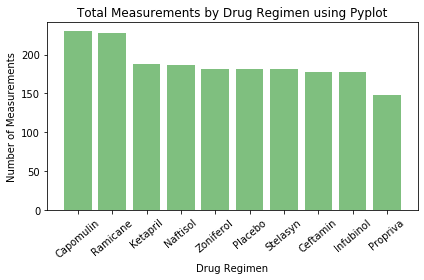

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen = clean_combined_mouse_data["Drug Regimen"].nunique()
drug_regimen_height = clean_combined_mouse_data["Drug Regimen"].value_counts()
x_axis = np.arange(len(drug_regimen_height))
plt.bar(x_axis,drug_regimen_height,color="g",alpha=0.5,align="edge")
plt.title("Total Measurements by Drug Regimen using Pyplot")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations,drug_regimen_height.index.values,rotation=40)
plt.tight_layout()
plt.savefig("Images/Total_Measurements")
plt.show()

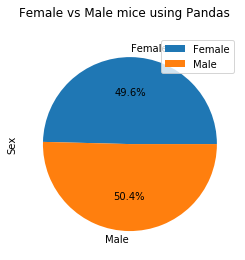

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female_pandas = clean_combined_mouse_data.groupby("Sex")
male_female_count = male_female_pandas["Mouse ID"].nunique()
male_female_pandas_df = pd.DataFrame({"Sex":male_female_count})
pie_plot = male_female_pandas_df.plot.pie(autopct="%1.1f%%",startangle=0, title="Female vs Male mice using Pandas",subplots=True)

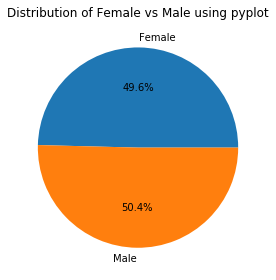

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female_pyplot = clean_combined_mouse_data.groupby("Sex")
male_female = male_female_pyplot["Mouse ID"].nunique()
male_female_pyplot_df = pd.DataFrame({"Sex":male_female_count})
sex = ["Female","Male"]
plt.pie(male_female_pyplot_df["Sex"],labels=sex, autopct="%1.1f%%",startangle=0)
plt.title("Distribution of Female vs Male using pyplot")
plt.tight_layout()
plt.savefig("Images/distribution_male_female")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_data = clean_combined_mouse_data[["Mouse ID","Timepoint"]]
last_mouse_group = last_timepoint_data.groupby("Mouse ID")
last_mouse = last_mouse_group.max()
last_mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor = pd.merge(last_mouse,clean_combined_mouse_data, on="Mouse ID")
final_tumor = final_tumor.rename(columns={"Timepoint_x": "Max Timepoint"})
final_tumor

,Mouse ID,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
1875,z969,45,Naftisol,Male,9,30,25,63.145652,2
1876,z969,45,Naftisol,Male,9,30,30,65.841013,3
1877,z969,45,Naftisol,Male,9,30,35,69.176246,4
1878,z969,45,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Put treatments into a list for a for loop (and later for plot labels)
drugs = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
drug_values = []
for drug in drugs:
    drug_df = final_tumor.loc[final_tumor["Drug Regimen"] == drug]
    
    # Create data frame to find final timepoint for reach drug
    final_timepoint_df = drug_df.loc[drug_df["Timepoint_y"] == drug_df["Max Timepoint"]]
    
    # Create a series for final volume for each drug
    final_volume = final_timepoint_df["Tumor Volume (mm3)"]
    drug_values.append(final_volume)
     
    # Calculate the IQR
    quartiles = final_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f"IQR for {drug}: {round(iqr,2)}")
    
    # Find the upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {drug} the lower bound is {round(lower_bound,2)} and the upper bound is {round(upper_bound,2)}")
       
    # Determine outliers using upper and lower bounds
    outliers = (final_volume.loc[(final_timepoint_df["Tumor Volume (mm3)"] >= upper_bound)| 
                                 (final_timepoint_df["Tumor Volume (mm3)"] <= lower_bound)]).count()
    print(f"Total count of outliers for {drug} is {round(outliers,2)}") 

IQR for Capomulin: 7.78
For Capomulin the lower bound is 20.7 and the upper bound is 51.83
Total count of outliers for Capomulin is 0
IQR for Ramicane: 9.1
For Ramicane the lower bound is 17.91 and the upper bound is 54.31
Total count of outliers for Ramicane is 0
IQR for Infubinol: 11.48
For Infubinol the lower bound is 36.83 and the upper bound is 82.74
Total count of outliers for Infubinol is 1
IQR for Ceftamin: 15.58
For Ceftamin the lower bound is 25.36 and the upper bound is 87.67
Total count of outliers for Ceftamin is 0


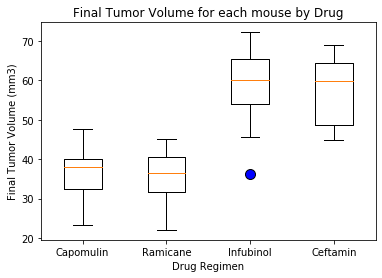

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier_boxplot = dict(marker="o",markerfacecolor="b",markersize=10,markeredgecolor="black")
plt.boxplot(drug_values,flierprops=outlier_boxplot)
plt.title("Final Tumor Volume for each mouse by Drug")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4],["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

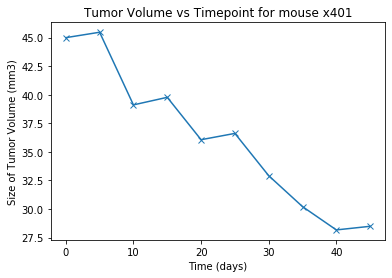

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_x401 = clean_combined_mouse_data.loc[clean_combined_mouse_data["Mouse ID"] == "x401"]
plt.plot(mouse_x401["Timepoint"],mouse_x401["Tumor Volume (mm3)"],marker="x")
plt.title("Tumor Volume vs Timepoint for mouse x401")
plt.xlabel("Time (days)")
plt.ylabel("Size of Tumor Volume (mm3)")
plt.show()

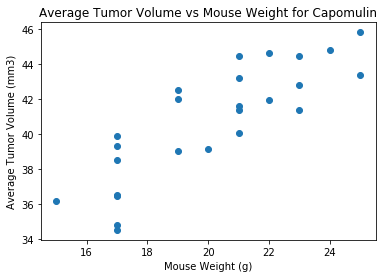

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Create data frame for Capomulin only
capomulin_df = clean_combined_mouse_data.loc[clean_combined_mouse_data["Drug Regimen"] == "Capomulin"]

# Find average tumor volume by mouse by using groupby
capomulin_group = capomulin_df.groupby("Mouse ID")
average_capomulin = capomulin_group["Tumor Volume (mm3)"].mean()

# Combine data frames
average_tumor = pd.merge(capomulin_df,average_capomulin, on="Mouse ID")
average_tumor = average_tumor.rename(columns={"Tumor Volume (mm3)_y": "Avg Tumor Volume"})
final_avg_tumor = average_tumor[["Weight (g)","Avg Tumor Volume"]].drop_duplicates()

# Create a scatter plot from new data frame
x = final_avg_tumor["Weight (g)"]
y = final_avg_tumor["Avg Tumor Volume"]
plt.scatter(x,y)
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

 The correlation coefficient between mouse weight and average tumor volume on Capomulin is 0.84


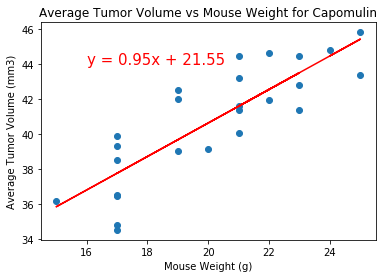

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Correlation coefficient using defined variables from cell above
correlation = st.pearsonr(x,y)
print(f" The correlation coefficient between mouse weight and average tumor volume on Capomulin is {round(correlation[0],2)}")

# Scatter plot code from cell above and linear regression model
x = final_avg_tumor["Weight (g)"]
y = final_avg_tumor["Avg Tumor Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("Images/linear_regression")
plt.show()